<a href="https://colab.research.google.com/github/jpbezerra/tiktok-analysis/blob/main/tiktok.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TO-DO
- fazer com que os gráficos fiquem mais legíveis, aq no colab ta dando bronca
- talvez fazer gráficos com os testes de hipotese

# SETTINGS

In [40]:
# imports

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import statistics as st
from scipy import stats
from statsmodels.stats.proportion import proportions_ztest

In [41]:
# configurations

data_path = "./user_data_tiktok.json"

my_colors = [
    "#E83E3E", "#E88929", "#ECDF2F", "#7BEC2F",
    "#30C986", "#1FC1B7", "#1CDDFA", "#298CBD",
    "#1382F2", "#1347F2", "#936DD4", "#DF37F2"
]

months_name = [
    "January", "February", "March", "April", "May", "June",
    "July", "August", "September", "October", "November", "December"
]

hours_name = [f"{x}:00" for x in range(24)]

days_name = [f"{day}" for day in range(1, 32)]

significance = 0.05

In [42]:
# creating Data class

class Data:
    data_json_path = data_path

    def __init__(self) -> None:
        self.data = pd.read_json(data_path)

        self.activity = self.data["Activity"]
        self.ads = self.data['Ads and data']
        self.comments = self.data['Comment']
        self.messages = self.data['Direct Messages']

        self.guard = {}

In [43]:
# defining auxiliary functions

def months_and_hours_review(data: np.ndarray, y: str, title: str, target_label='Date') -> list[np.ndarray]:
    months = np.zeros(12, dtype=int)
    hours = np.zeros(24, dtype=int)

    for label in data:
        date, time = label[target_label].split(' ')

        months[int(date.split('-')[1]) - 1] += 1
        hours[int(time.split(':')[0])] += 1

    # barplot of date
    plt.bar(
        x=months_name,
        height=months,
        color=my_colors
    )

    plt.xlabel("Months")
    plt.ylabel(f"Amount of {y}")
    plt.title(f"Relação entre meses do ano e {title}")
    plt.grid()
    plt.show()

    # barplot of time
    plt.bar(
        x=hours_name,
        height=hours,
        color=my_colors
    )

    plt.xlabel("Hours")
    plt.ylabel(f"Amount of {y}")
    plt.title(f"Relação entre horas do dia e {title}")
    plt.grid()
    plt.show()

    return [months, hours]

def pie_review(data : np.ndarray, target_label : str, title : str) -> None:
    information : dict[str, int] = {}

    for info in data:
        target = info[target_label]

        try:
            information[target] += 1

        except KeyError:
            information[target] = 1

    temp : dict[str, int] = information.copy()

    for key, value in temp.items():
        if 15 > value:
            try:
                information['Others'] += value

            except KeyError:
                information['Others'] = value

            finally:
                information.pop(key)

    plt.pie(
        x=information.values(), labels=information.keys(), autopct='%1.1f%%', colors=my_colors,
        pctdistance=0.80
    )

    plt.title(f"Quantidade de {title}")
    plt.show()

def unique(data : np.ndarray, target_label : str) -> np.ndarray:
    result : np.ndarray = np.array([])

    for info in data:
        result = np.append(result, info[target_label])

    return np.unique(result)

def line_review(data : np.ndarray, target_label : str, title : str) -> None:
    days : np.ndarray = np.zeros(31, dtype=int)

    for info in data:
        days[int(info[target_label].split(' ')[0].split('-')[2]) - 1] += 1

    plt.plot(days_name, days, marker='o')
    plt.title(f"Relação entre dias e {title}")
    plt.grid()
    plt.xlabel("Days")

def get_measures(data : np.ndarray) -> dict:
    return {'Mean' : st.mean(data), 'Median' : st.median(data), 'Mode' : st.multimode(data)}

def check_relation(first_data : np.ndarray, second_data : np.ndarray, first_label : str, second_label : str):
    plt.scatter(x=first_data, y=second_data)
    plt.xlabel(first_label)
    plt.ylabel(second_label)
    plt.grid()
    plt.show()

def hypotesis_analysis(statistics : float, p_value : float):
    print(f"Test statistics : {statistics:.4f}\nP-value : {p_value:.4f}")

    if p_value < significance:
        print("Rejeitamos a hipótese nula, existem dados suficientes para apontar tal correlação\n")

    else:
        print("Não rejeitamos a hipótese nula, não existem dados suficientes para apontar tal correlação\n")

In [44]:
# creating the dataset

if __name__ == "__main__":
    data = Data()

# MESSAGES

In [45]:
# declaring variables

chat_history : dict[str, list] = data.messages['Chat History']['ChatHistory']

info : dict[str, int] = {}
measures_each_account : np.ndarray = np.array([])
account_names : np.ndarray = np.array([])

my_messages = np.array([])
other_messages = np.array([])

In [46]:
# getting data

for key, value in chat_history.items():
    if 10 > len(value):
        try:
            info['Others'] += len(value)

        except KeyError:
            info['Others'] = len(value)

    else:
        info[key.split(' ')[-1].split(':')[0]] = len(value)

    account_names = np.append(account_names, key)
    measures_each_account = np.append(measures_each_account, len(value))

    for subdata in value:
        if subdata['From'] == "jp__bezerra":
            my_messages = np.append(my_messages, subdata)

        else:
            other_messages = np.append(other_messages, subdata)

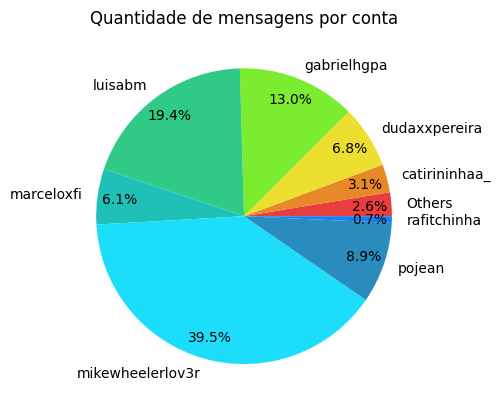

In [47]:
plt.pie(
            x=info.values(), labels=info.keys(), autopct='%1.1f%%', colors=my_colors,
            pctdistance=0.85
    )

plt.title("Quantidade de mensagens por conta")
plt.show()

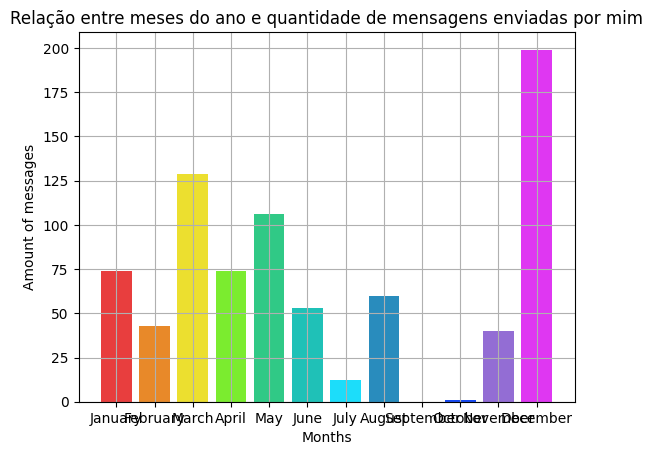

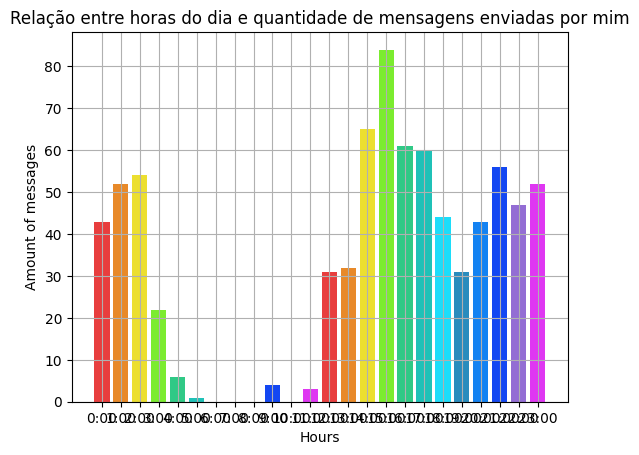

In [48]:
m_sent, h_sent = months_and_hours_review(my_messages, "messages", "quantidade de mensagens enviadas por mim")

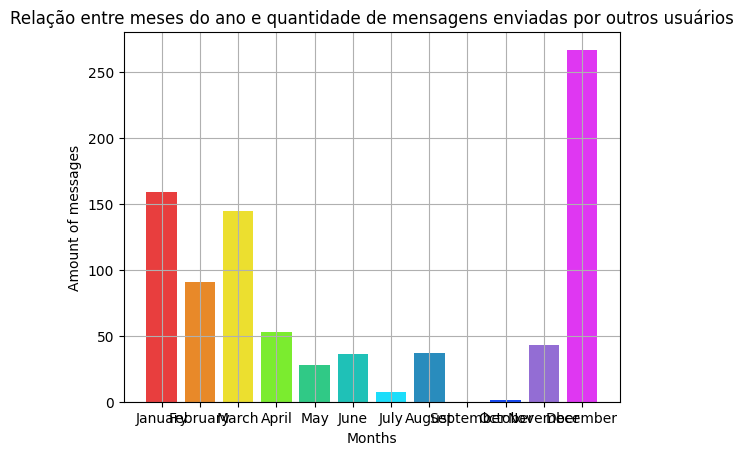

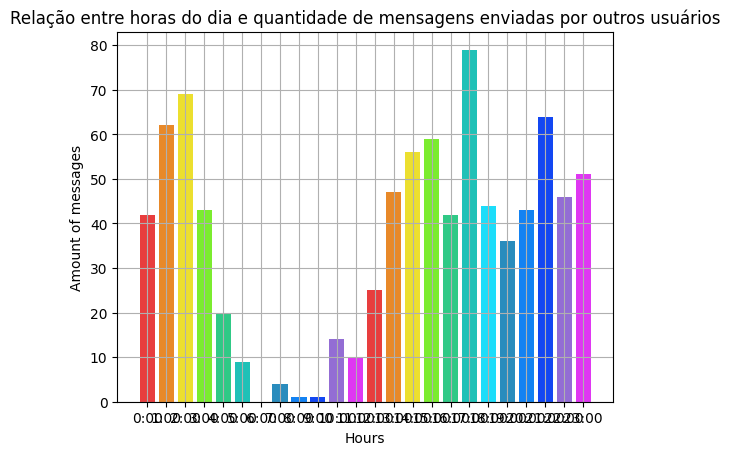

In [49]:
m_receive, h_receive = months_and_hours_review(other_messages, "messages", "quantidade de mensagens enviadas por outros usuários")

In [50]:
list_messages = list(info.values())
max_value = np.max(list_messages)
label_max = list(info.keys())[list_messages.index(max_value)]

print(f"With {max_value} messages, the person who i have most messages with is {label_max}")

With 655 messages, the person who i have most messages with is mikewheelerlov3r


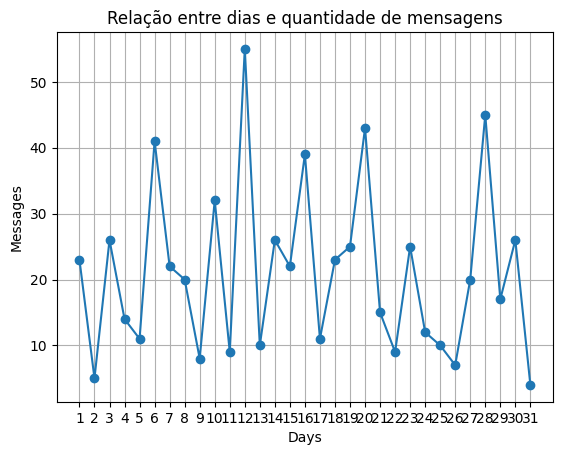

In [51]:
line_review(chat_history[f"Chat History with {label_max}:"], 'Date', "quantidade de mensagens")
plt.ylabel("Messages")
plt.show()

In [52]:
measures = get_measures(measures_each_account)
print(f"Mean : {measures['Mean']}\nMedian : {measures['Median']}\nMode : {measures['Mode']}")

Mean : 87.26315789473684
Median : 8.0
Mode : [1.0]


In [53]:
# storing variables for later

data.guard['Messages'] = {'M' : [m_sent, m_receive], 'H' : [h_sent, h_receive]}

# COMMENTS

In [54]:
# declaring variables

comments = np.array(data.comments['Comments']['CommentsList'])

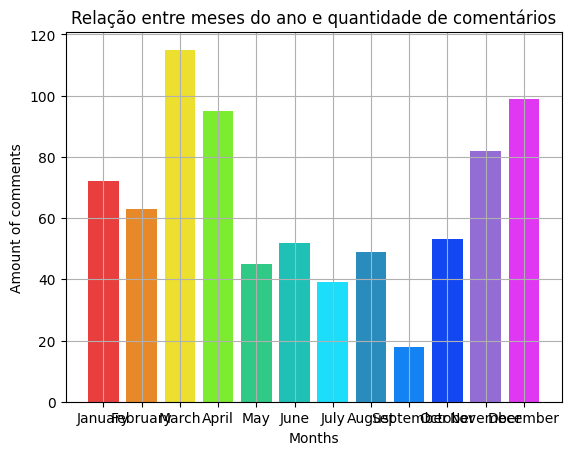

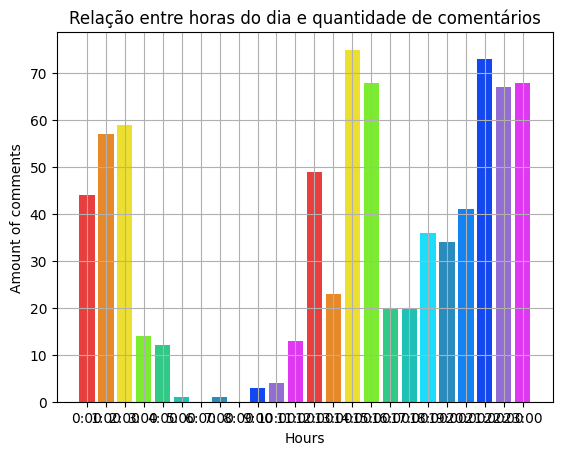

In [55]:
m_comments, h_comments = months_and_hours_review(comments, "comments", "quantidade de comentários")

In [56]:
sizes = np.array([])
for comment in comments:
    sizes = np.append(sizes, len(comment['Comment']))

print(f"Possuo a média de digitar {np.mean(sizes):.2f} caracteres por comentário feito")

Possuo a média de digitar 12.63 caracteres por comentário feito


In [57]:
# storing variables for later

data.guard['Comments'] = {'M' : m_comments, 'H' : h_comments}

# ACTIVITY

In [58]:
# declaring variables

fav_video_list = np.array(data.activity['Favorite Videos']['FavoriteVideoList'])
like_list = np.array(data.activity['Like List']['ItemFavoriteList'])
search_history = np.array(data.activity['Search History']['SearchList'])
share_history = np.array(data.activity['Share History']['ShareHistoryList'])
video_browsing_history = np.array(data.activity['Video Browsing History']['VideoList'])
login_history = np.array(data.activity['Login History']['LoginHistoryList'])

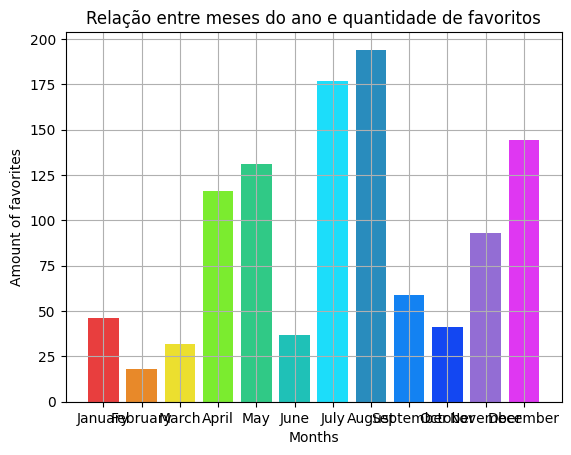

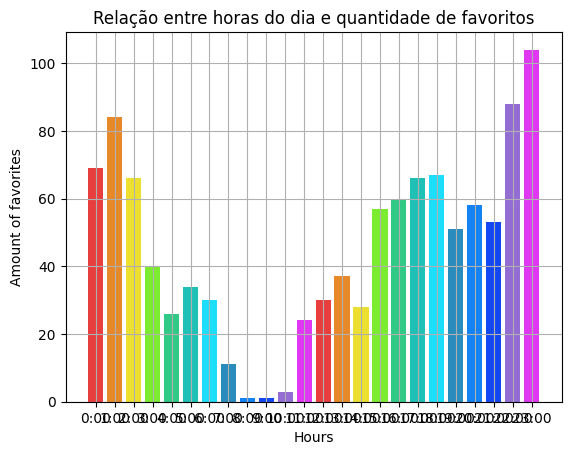

In [59]:
m_fav, h_fav = months_and_hours_review(fav_video_list, "favorites", "quantidade de favoritos")

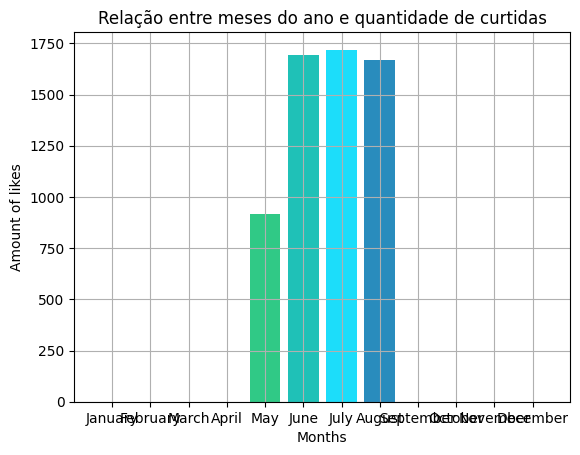

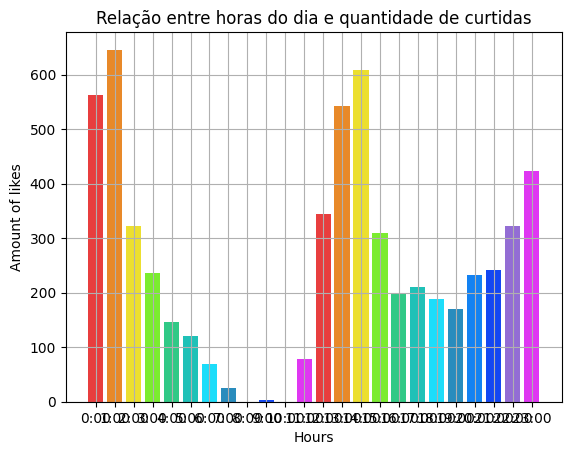

In [60]:
m_likes, h_likes = months_and_hours_review(like_list, "likes", "quantidade de curtidas")

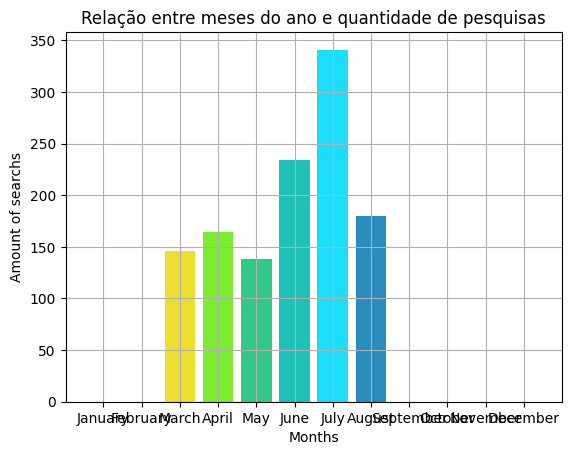

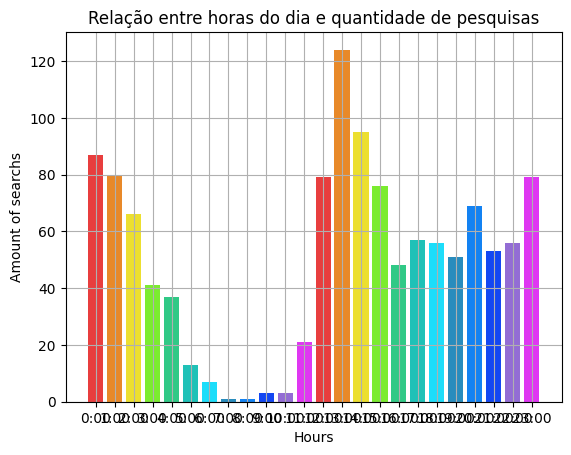

I've searched 1038 different terms on tiktok


In [61]:
m_search, h_search = months_and_hours_review(search_history, "searchs", "quantidade de pesquisas")

search_term = unique(search_history, 'SearchTerm')
print(f"I've searched {len(search_term)} different terms on tiktok")

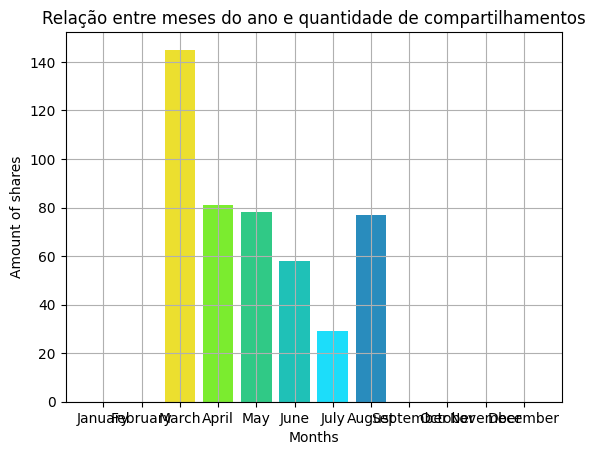

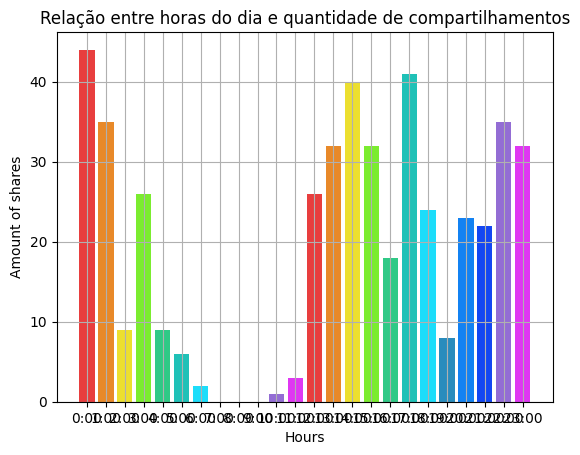

In [62]:
m_share, h_share = months_and_hours_review(share_history, "shares", "quantidade de compartilhamentos")

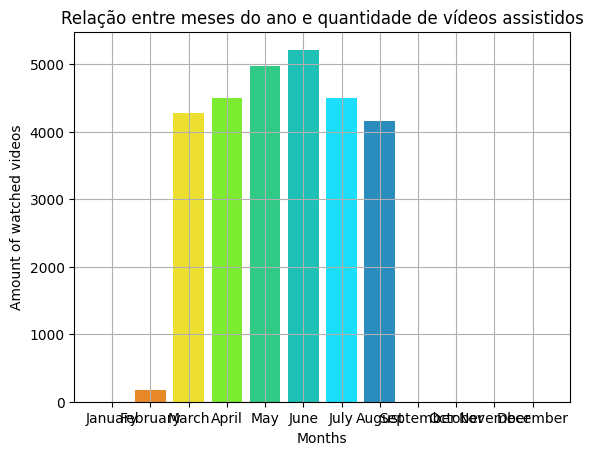

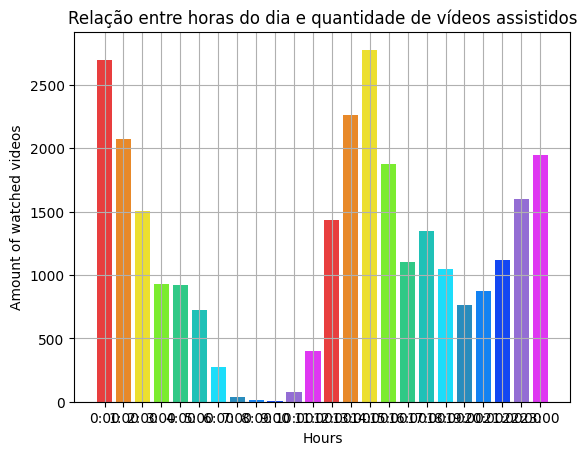

In [63]:
m_video, h_video = months_and_hours_review(video_browsing_history, "watched videos", "quantidade de vídeos assistidos")

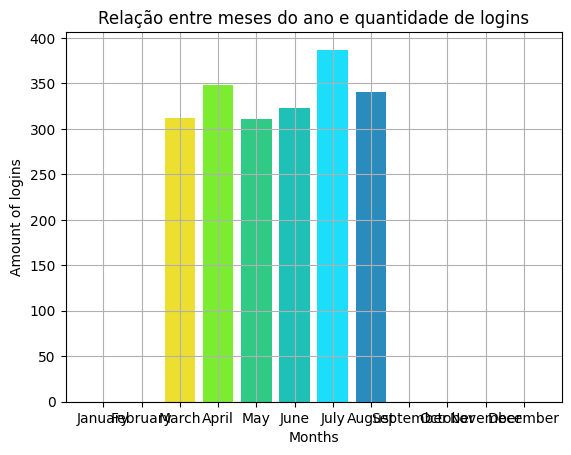

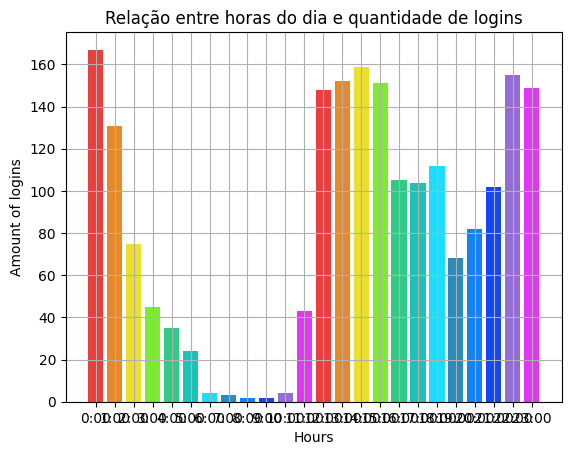

[array([  0,   0, 312, 348, 311, 323, 387, 341,   0,   0,   0,   0]),
 array([167, 131,  75,  45,  35,  24,   4,   3,   2,   2,   4,  43, 148,
        152, 159, 151, 105, 104, 112,  68,  82, 102, 155, 149])]

In [64]:
months_and_hours_review(login_history, "logins", "quantidade de logins")

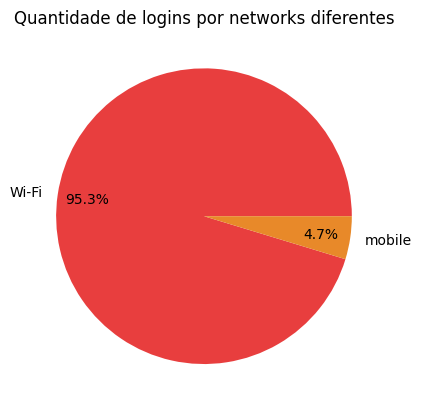

In [65]:
pie_review(login_history, 'NetworkType', "logins por networks diferentes")

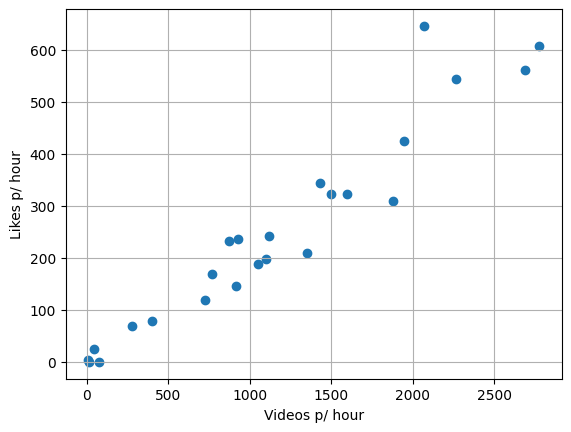

In [66]:
check_relation(h_video, h_likes, "Videos p/ hour", "Likes p/ hour")

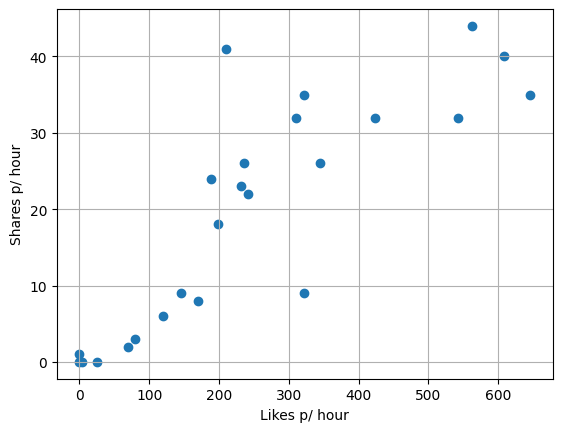

In [67]:
check_relation(h_likes, h_share, "Likes p/ hour", "Shares p/ hour")

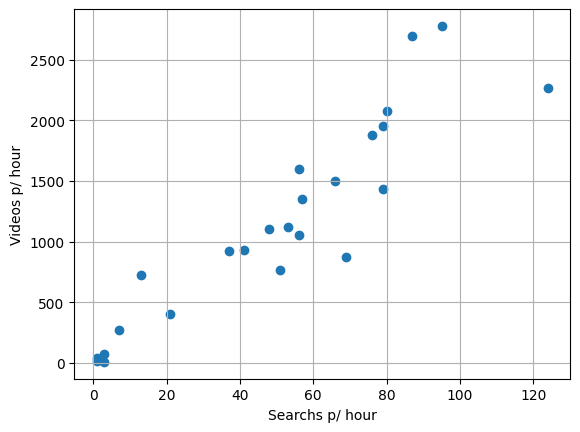

In [68]:
check_relation(h_search, h_video, "Searchs p/ hour", "Videos p/ hour")

In [69]:
# storing variables for later

data.guard['Favorites'] = {'M': m_fav, 'H': h_fav}
data.guard['Search'] = {'M' : m_search, 'H' : h_search}
data.guard['Share'] = {'M': m_share, 'H': h_share}
data.guard['Watched'] = {'M' : m_video}

# ADS

In [70]:
# declaring variables

ads_activity = np.array(data.ads['Off TikTok Activity']['OffTikTokActivityDataList'])

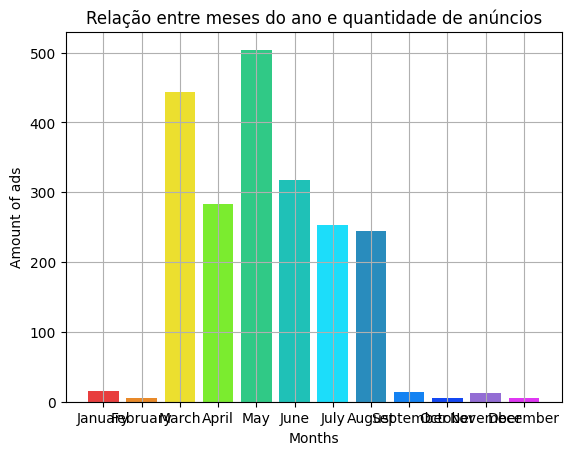

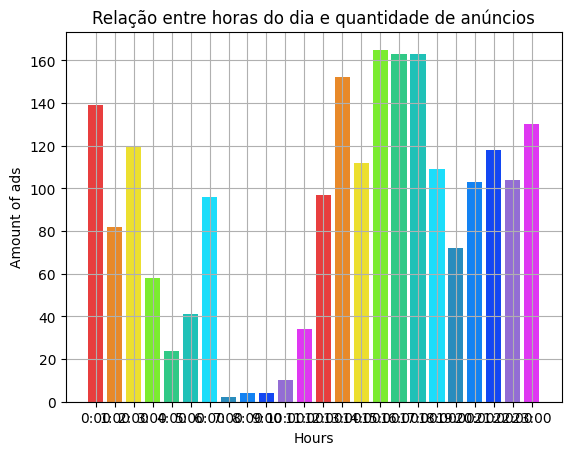

[array([ 15,   5, 444, 283, 504, 317, 253, 244,  14,   5,  13,   5]),
 array([139,  82, 120,  58,  24,  41,  96,   2,   4,   4,  10,  34,  97,
        152, 112, 165, 163, 163, 109,  72, 103, 118, 104, 130])]

In [71]:
months_and_hours_review(ads_activity, "ads", "quantidade de anúncios", target_label='TimeStamp')

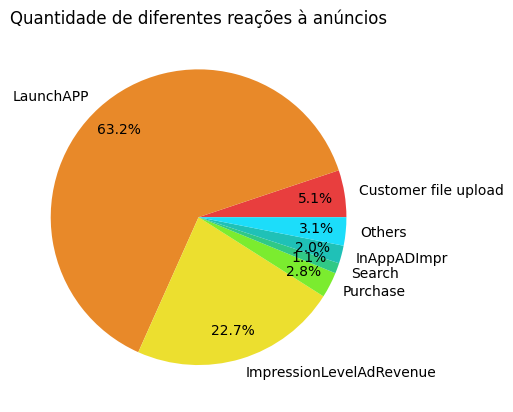

In [72]:
pie_review(ads_activity, 'Event', "diferentes reações à anúncios")

In [73]:
sources = unique(ads_activity, 'Source')

print(f"I've had {len(sources)} different source-ads on tiktok")

I've had 52 different source-ads on tiktok


# HYPOTESIS

In [74]:
# HIPÓTESE 1
# - Os horários e meses em que eu recebo mais mensagens tendem a ser os mesmos em que eu envio mais mensagens
# H0: os horários e meses de recebimento/envio de mensagens são diferentes
# HA: os horários e meses de recebimento/envio de mensagens são os mesmos
# Nível de significância de 5%

s_hip1_h, p_hip1_h = stats.pearsonr(data.guard['Messages']['H'][0], data.guard['Messages']['H'][1])
hypotesis_analysis(s_hip1_h, p_hip1_h)
# pode falar que ta proxima de 1, e positiva

s_hip1_m, p_hip1_m = stats.pearsonr(data.guard['Messages']['M'][0], data.guard['Messages']['M'][1])
hypotesis_analysis(s_hip1_m, p_hip1_m)

Test statistics : 0.9029
P-value : 0.0000
Rejeitamos a hipótese nula, existe correlação

Test statistics : 0.8485
P-value : 0.0005
Rejeitamos a hipótese nula, existe correlação



In [75]:
# HIPÓTESE 2
# - Os horários e meses em que eu mais compartilho tendem a ser os mesmos em que eu mais pesquiso
# H0: os horários e meses de compartilhamento/pesquisas são diferentes
# HA: os horários e meses de compartilhamento/pesquisas são os mesmos
# Nível de significância de 5%

s_hip2_m, p_hip2_m = stats.pearsonr(data.guard['Share']['M'], data.guard['Search']['M'])
hypotesis_analysis(s_hip2_m, p_hip2_m)

s_hip2_h, p_hip2_h = stats.pearsonr(data.guard['Share']['H'], data.guard['Search']['H'])
hypotesis_analysis(s_hip2_h, p_hip2_h)

Test statistics : 0.5752
P-value : 0.0504
Não rejeitamos a hipótese nula, não existe correlação

Test statistics : 0.8373
P-value : 0.0000
Rejeitamos a hipótese nula, existe correlação



In [76]:
# HIPÓTESE 3
# - É mais provável que eu curta um vídeo ao invés de deixar de curtir
# H0: a proporção de vídeos curtidos é menor ou igual com a proporção de vídeos assistidos
# HA: a proporção de vídeos curtidos é igual com a proporção de vídeos compartilhados
# Nível de significância de 5%

liked_videos = len(np.array(data.activity['Like List']['ItemFavoriteList']))
watched_videos = len(np.array(data.activity['Video Browsing History']['VideoList'])) - liked_videos - data.guard['Watched']['M'][1]

s_hip3, p_hip3 = proportions_ztest(
    np.array([liked_videos, watched_videos]),
    np.array([liked_videos + watched_videos, liked_videos + watched_videos]),
    alternative='larger'
)

hypotesis_analysis(s_hip3, p_hip3)

Test statistics : -132.9425
P-value : 1.0000
Não rejeitamos a hipótese nula, não existe correlação

